     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3

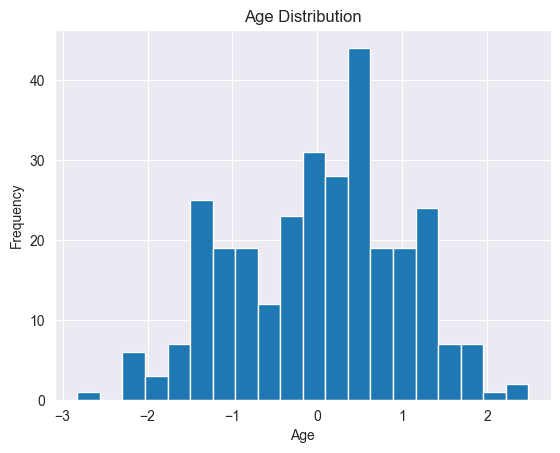

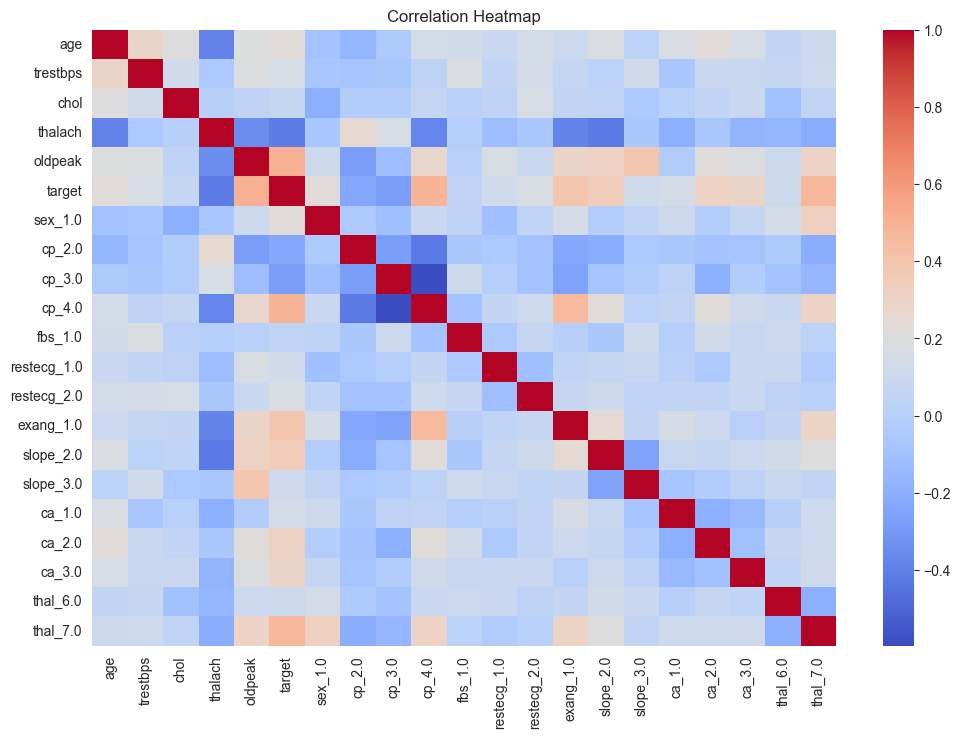

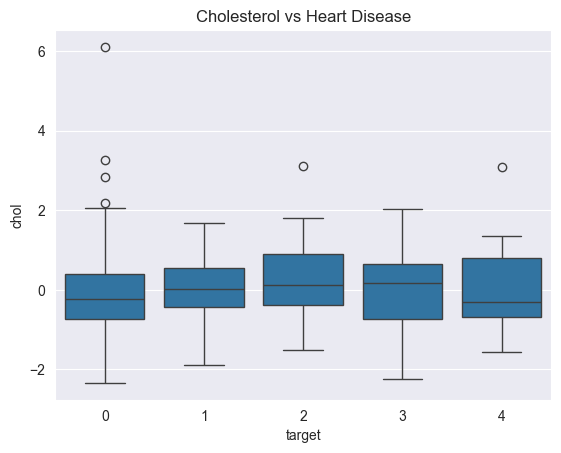

        age  trestbps      chol   thalach   oldpeak  target  sex_1.0  cp_2.0  \
0  0.936181  0.750380 -0.276443  0.017494  1.068965       0     True   False   
1  1.378929  1.596266  0.744555 -1.816334  0.381773       2     True   False   
2  1.378929 -0.659431 -0.353500 -0.899420  1.326662       1     True   False   
3 -1.941680 -0.095506  0.051047  1.633010  2.099753       0     True   False   
4 -1.498933 -0.095506 -0.835103  0.978071  0.295874       0    False    True   

   cp_3.0  cp_4.0  ...  restecg_1.0  restecg_2.0  exang_1.0  slope_2.0  \
0   False   False  ...        False         True      False      False   
1   False    True  ...        False         True       True       True   
2   False    True  ...        False         True       True       True   
3    True   False  ...        False        False      False      False   
4   False   False  ...        False         True      False      False   

   slope_3.0  ca_1.0  ca_2.0  ca_3.0  thal_6.0  thal_7.0  
0       True   

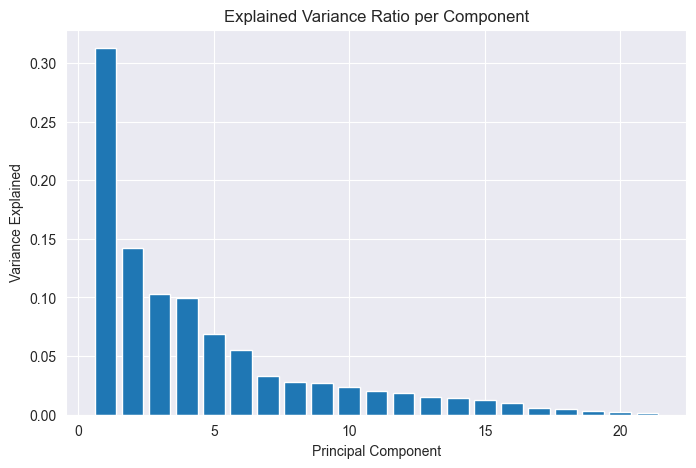

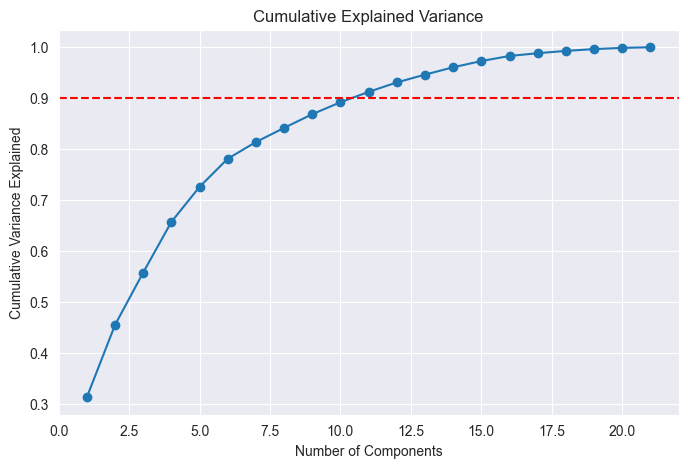

     Feature  Importance
7    thalach    0.138926
9    oldpeak    0.117851
0        age    0.115244
4       chol    0.113633
3   trestbps    0.099319
11        ca    0.094761
12      thal    0.082430
2         cp    0.075682
8      exang    0.046423
10     slope    0.042554


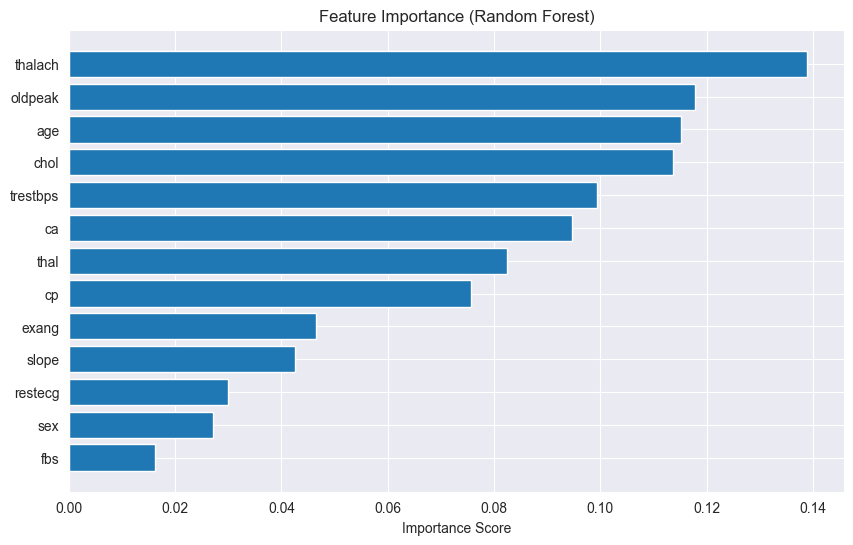

Selected Features via RFE: ['age', 'sex', 'cp', 'fbs', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
dtype: object
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
dtype: object
Selected Features via Chi-Square: ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']
Final Selected Features: ['fbs', 'trestbps', 'thal', 'age', 'thalach', 'sex', 'ca', 'oldpeak', 'cp', 'chol', 'restecg', 'exang', 'slope']
Reduced dataset shape: (297, 13)


In [1]:
%run 03_feature_selection.ipynb


In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_reduced , y, test_size=0.2, random_state=42, stratify=y)

print("training set shape:", x_train.shape)
print("test set shape:", x_test.shape)

training set shape: (237, 13)
test set shape: (60, 13)


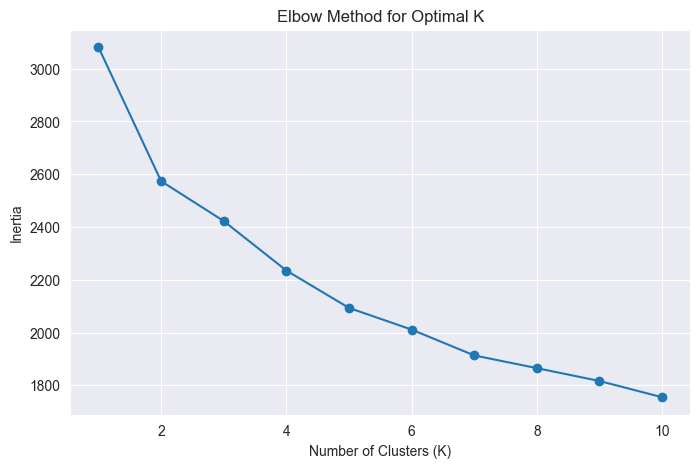

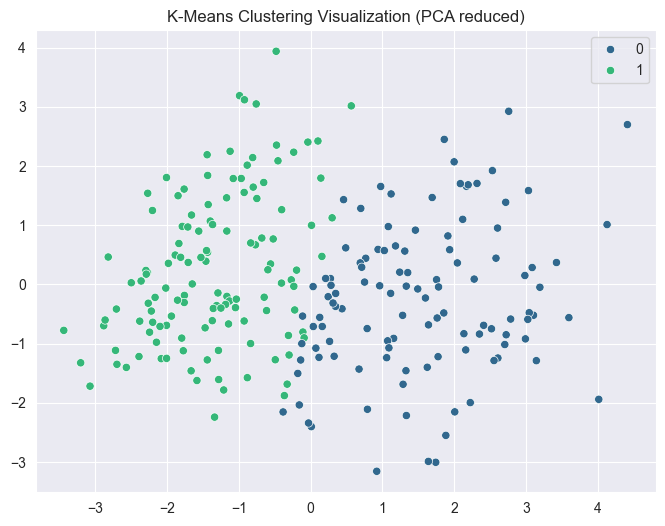

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Elbow Method to choose K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_train_scaled)   # use scaled data
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Apply KMeans with chosen K
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(x_train_scaled)

# Visualize clusters in 2D (reduce to 2D using PCA for plotting)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(x_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], hue=clusters, palette="viridis")
plt.title("K-Means Clustering Visualization (PCA reduced)")
plt.show()


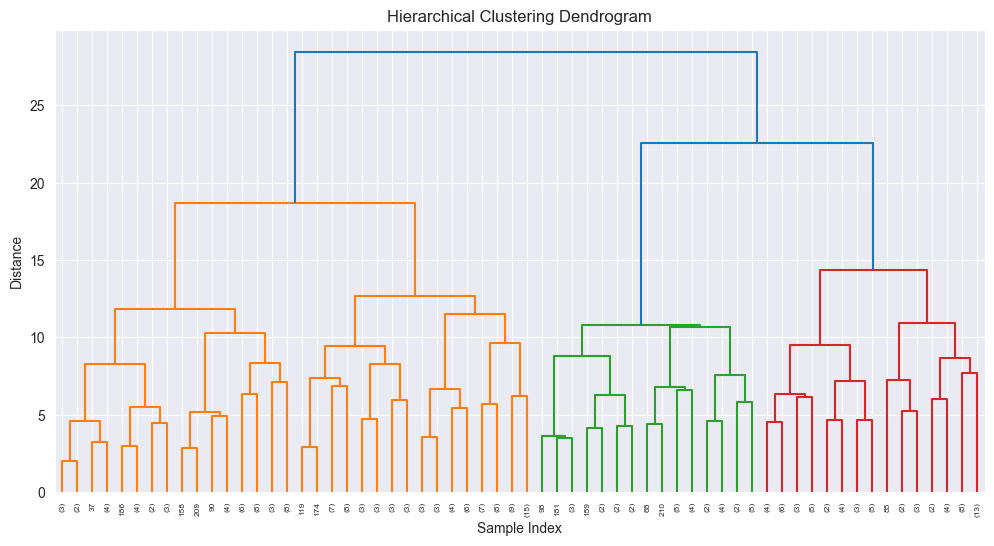

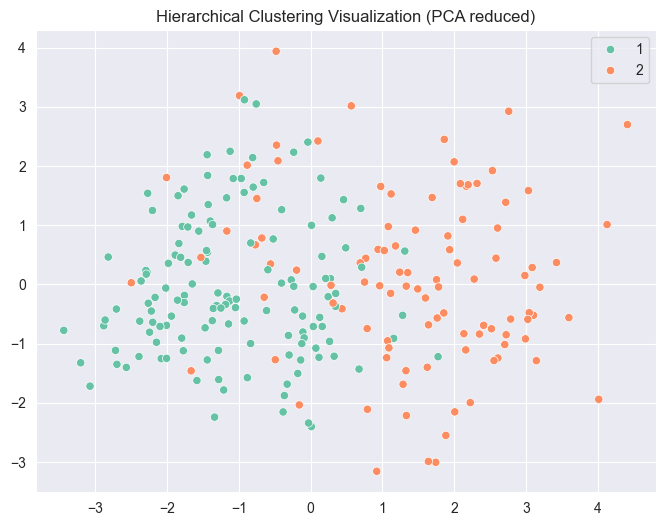

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform Hierarchical clustering
Z = linkage(x_train_scaled, method='ward')  # ward minimizes variance within clusters

# Plot dendrogram
plt.figure(figsize=(12,6))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Cut the dendrogram into 2 clusters
hier_clusters = fcluster(Z, t=2, criterion='maxclust')

# Visualize clusters (again reduce to 2D with PCA)
plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], hue=hier_clusters, palette="Set2")
plt.title("Hierarchical Clustering Visualization (PCA reduced)")
plt.show()


In [5]:
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, confusion_matrix

print("KMeans ARI:", adjusted_rand_score(y_train, clusters))
print("Hierarchical ARI:", adjusted_rand_score(y_train, hier_clusters))

print("KMeans Homogeneity:", homogeneity_score(y_train, clusters))
print("Hierarchical Homogeneity:", homogeneity_score(y_train, hier_clusters))

print("KMeans Completeness:", completeness_score(y_train, clusters))
print("Hierarchical Completeness:", completeness_score(y_train, hier_clusters))

# Confusion matrix (for KMeans)
print("Confusion Matrix (KMeans):")
print(confusion_matrix(y_train, clusters))


KMeans ARI: 0.2549049869287709
Hierarchical ARI: 0.18641605279188936
KMeans Homogeneity: 0.1867031428036313
Hierarchical Homogeneity: 0.12347205518256772
KMeans Completeness: 0.3459454665694896
Hierarchical Completeness: 0.2317817338009206
Confusion Matrix (KMeans):
[[ 25 103   0   0   0]
 [ 24  19   0   0   0]
 [ 26   2   0   0   0]
 [ 26   2   0   0   0]
 [ 10   0   0   0   0]]
